In [21]:
## 선형회귀분석 오류
# 곤충질량(G)에 따라 암수구분하는 모델 생성
# 0:암컷, 1:수컷

wght = [1.94,1.67,0.92,1.11,1.41,1.65,2.28,0.47,1.07,2.19,2.08,1.02,0.91,1.16,1.46,1.02,0.85,0.89,1.79,1.89,0.75,0.9,1.87,0.5,0.69,1.5,0.96,0.53,1.21,0.6]

spcs = [1,1,0,0,1,1,1,0,0,1,1,0,0,0,1,0,0,0,1,1,0,1,1,0,0,1,1,0,1,0]

In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [23]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [28]:
lr = LinearRegression()
lr.fit(np.array(wght).reshape(-1,1), spcs)

lr.coef_, lr.intercept_
# 0.75, -0.43

(array([0.74825276]), -0.43007818056050295)

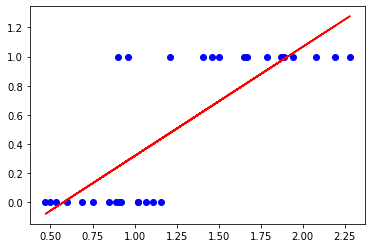

In [30]:
pred = lr.predict(np.array(wght).reshape(-1,1))
r2_score(spcs,pred)
plt.plot(wght, spcs, 'bo')
plt.plot(wght, pred, 'r-')

## 종속변수가 범주형인 경우
* 선형방정식은 이항분포를 따르는 데이터에 적용하기에 다소 맞지 않음
 + $ y = ax + b $
* 즉, 우변값의 범위는 '-무한대~ +무한대'이지만, 좌변값의 범위는 '0~1'임
* 따라서, 좌변값의 범위를 우변과 동일하게 '-무한대~+무한대'로 하려면 적절한 변환함수가 필요.
 + 로짓함수를 이용해서 변환함
 + ### $ f(x) = \frac {1} {1 + eA^{-x}} $

In [35]:
# 로짓함수 정의
def logistic(x, w):
    yy = 1 / (1 +np.exp(-(w[0]*x + w[1])))
    return yy

In [44]:
# 로짓함수를 이용해서 다시 그래프를 그림
XX = np.linspace(0.5, 2.25, 50)  # 기울기와 절편을 임의로 설정
yy = logistic(np.array(wght).reshape(-1,1), W)

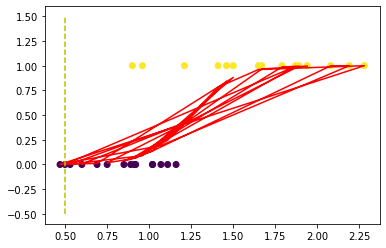

In [49]:
# 결정경계 표시 (yy가 0.5이상되는 지점 알아냄)
plt.scatter(pd.Series(wght), pd.Series(spcs), c=spcs)
plt.plot(wght, yy, 'r-')
i = np.min( np.where(yy >= 0.5) )
xp = (XX[i])
plt.plot([xp,xp], [-.5,1.5], 'y--')

In [117]:
# sklearn에서 제공하는 LogisticRegression으로 분석하기
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [118]:
X = np.array(wght).reshape(-1,1)
y = spcs

lrclf = LogisticRegression()
lrclf.fit(X, y)
pred = lrclf.predict(X)

accuracy_score(y, pred) # 0.9

0.9

## 정확도는 0.9가 나옴.

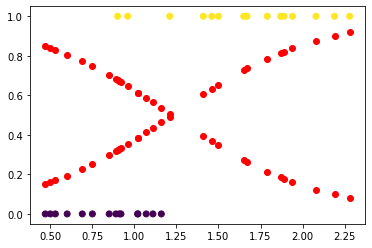

In [119]:
plt.scatter(X, y, c=y)
yy = lrclf.predict_proba(X)
plt.plot(X, yy, 'ro')

## 얘가 만들어준 로짓함수는 이런 결과로 나왔다. 임계값은 어떻게 나와요? 
## 아까처럼 y찍어보면 알겠죠? 얘도 1.25에 근접하게 나왔죠? 

### LogisticRegression() : 경우에 따르자면 옵션을 주면 더 잘 작동한다. 
### solver : sklearn 20.x 이상부터는 명시적 지정 필요
### liblinear : 이항회귀, 비교적 작은 데이터셋에 적합.
### lbfgs, newton-g : 다항회귀, L1제약 
### sag, saga : 다항회귀, L2제약, 확률적경사하강법 적용


In [120]:
X = np.array(wght).reshape(-1,1)
y = spcs

lrclf = LogisticRegression(solver='liblinear') # 경우에 따르자면 옵션을 주면 더 잘 작동한다. 
lrclf.fit(X, y)
pred = lrclf.predict(X)

accuracy_score(y, pred) # 0.9

0.8666666666666667

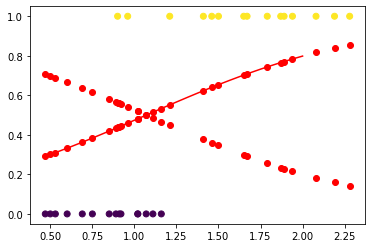

In [121]:
plt.scatter(X, y, c=y)
yy = lrclf.predict_proba(X)
plt.plot(X, yy, 'ro')

xx = np.linspace(0.5, 2,25, 50).reshape(-1,1)
yy = lrclf.predict_proba(xx) # 0, 1일 확률
plt.plot(xx, yy[:, 1], 'r-')

임계값 [1.125]


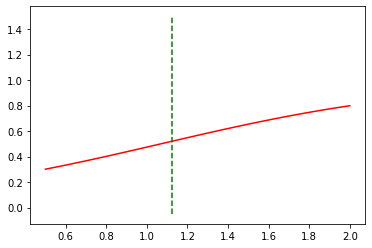

In [122]:
xx = np.linspace(0.5, 2,25, 50).reshape(-1,1)
yy = lrclf.predict_proba(xx) # 0, 1일 확률
plt.plot(xx, yy[:, 1], 'r-')
i = np.min( np.where(yy[:,1] >= 0.5) )
xp = xx[i]
plt.plot([xp,xp], [-.05, 1.5], 'g--')
print('임계값', xp)

## multi_class = 'multinomial' # 다항회귀설정

# iris 데이터셋을 이용한 로지스틱 회귀
* 4+1 변수, 150개 데이터로 구성
* 결과값은 3가지 : setosa, versicolaor, verginica

In [156]:
# 꽃잎너비, 레이블이c인 경우에 대한 경계값 알아보기

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
iris = load_iris()

In [157]:
Xtrain, Xtest, ytrain, ytest = train_test_split(iris.data, iris.target, test_size=0.3, stratify=iris.target, random_state=2111091510)

In [158]:
# C : 규제매개변수, 값이 작아지면 규제강도 증가.
lrclf = LogisticRegression(solver='sag', multi_class='multinomial', C=0.1)
lrclf.fit(Xtrain, ytrain)
pred = lrclf.predict(Xtest)

/home/hadoop/.local/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


In [159]:
accuracy_score(Ytest, pred) 

0.9777777777777777

In [160]:
X = iris.data[:3 ] # petal width
y = (iris.target == 2).astype(np.int32)

np.min(X), np.max(X)
y[:5]

array([0, 0, 0, 0, 0], dtype=int32)

In [162]:
## 이항분류니까 Virginica.
lrclf = LogisticRegression(solver='lbfgs')
lrclf.fit(data, target)
print(lrclf.score(data,target))  # 훈련정확도

0.82


ValueError: x and y must be the same size

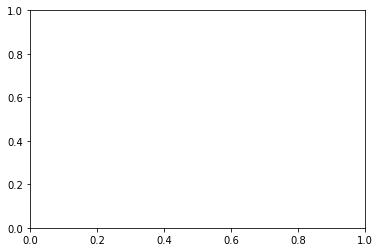

In [163]:
plt.scatter(X,y, c=y)

xx = np.linspace(0,2.5, 100).reshape(-1,1)
yy = lrclf.predict_proba(xx)
plt.plot(xx, yy[:,1], 'r')

In [164]:
# 임계값 확인
i = np.min( np.where(yy[:,1] >= 0.5) )
xp = (xx[i])
print('임계값', xp)

임계값 [3.8  3.82 3.84 3.86 3.88 3.9  3.92 3.94 3.96 3.98 4.   4.02 4.04 4.06
 4.08 4.1  4.12 4.14 4.16 4.18 4.2  4.22 4.24 4.26 4.28 4.3  4.32 4.34
 4.36 4.38 4.4  4.42 4.44 4.46 4.48 4.5  4.52 4.54 4.56 4.58 4.6  4.62
 4.64 4.66 4.68 4.7  4.72 4.74 4.76 4.78 4.8  4.82 4.84 4.86 4.88 4.9
 4.92 4.94 4.96 4.98 5.   5.02 5.04 5.06 5.08 5.1  5.12 5.14 5.16 5.18
 5.2  5.22 5.24 5.26 5.28 5.3  5.32 5.34 5.36 5.38 5.4  5.42 5.44 5.46
 5.48 5.5  5.52 5.54 5.56 5.58 5.6  5.62 5.64 5.66 5.68 5.7  5.72 5.74
 5.76 5.78 5.8  5.82 5.84 5.86 5.88 5.9  5.92 5.94 5.96 5.98 6.   6.02
 6.04 6.06 6.08 6.1  6.12 6.14 6.16 6.18 6.2  6.22 6.24 6.26 6.28 6.3
 6.32 6.34 6.36 6.38 6.4  6.42 6.44 6.46 6.48 6.5  6.52 6.54 6.56 6.58
 6.6  6.62 6.64 6.66 6.68 6.7  6.72 6.74 6.76 6.78 6.8  6.82 6.84 6.86
 6.88 6.9  6.92 6.94 6.96 6.98 7.   7.02 7.04 7.06 7.08 7.1  7.12 7.14
 7.16 7.18 7.2  7.22 7.24 7.26 7.28 7.3  7.32 7.34 7.36 7.38 7.4  7.42
 7.44 7.46 7.48 7.5  7.52 7.54 7.56 7.58 7.6  7.62 7.64 7.66 7.68 7.7
 7.72

## 결정경계 시각화
* 4차원을 시각화하는건 감지하는 것 조차 어렵기 때문에, 보통의 경우에는 3차원까지 시각화를 하는데, 3차원 시각화는 복잡하다. 보통 우리는 2차원 시각화를 환다.
* iris의 feature를 2개로 나눠 재학습.

#  시각화를 위해 두 변수만 지정


In [171]:
data = iris.data[:, :2] # Sepal 속성만
# data = iris.data[:, 2:] # Petal 속성만

target= iris.target

In [195]:
# 분석시작 
lrclf = LogisticRegression(solver='lbfgs')
lrclf.fit(data, target)
print(lrclf.score(data, target)) # 훈련정확도

# pcolormesh 함수 사용시 필요!
plt.rcParams['pcolor.shading'] = 'nearest'

0.82


In [196]:
# 다항로지스틱 결정경계 시각화
x_min = data[:,0].min() - 0.5 # x축 최대/최소
x_max = data[:,0].max() + 0.5

y_min = data[:,1].min() - 0.5 # y축 최대/최소
y_max = data[:,1].max() + 0.5

In [197]:
# x/y 축 범위의 값들 생성

# 생성한 값들을 x,y쌍으로 좌표펴면에 배치
# 즉, 예측값을 나타낼 좌표평면을 정의함
xm = np.arange(x_min, x_max, 0.02)
ym = np.arange(y_min, y_max, 0.02)
xx, yy = np.meshgrid(xm, ym)
xx[:1]
yy[:1]

array([[1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5,
        1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5,
        1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5,
        1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5,
        1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5,
        1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5,
        1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5,
        1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5,
        1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5,
        1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5,
        1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5,
        1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5,
        1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5,
        1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5

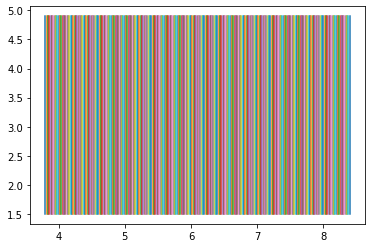

In [192]:
# 지금까지의 작업 확인
plt.plot(xx, yy)
plt.show()

### 위에서 만든 x,y쌍을 모델을 통해 예측함
### pcolormesh : 내장된 칼라맵을 통해 지정한 위치에 히트맵을 그려주는 함수.
### pcolormesh(x좌표, y좌표, 색상값, 칼라맵)

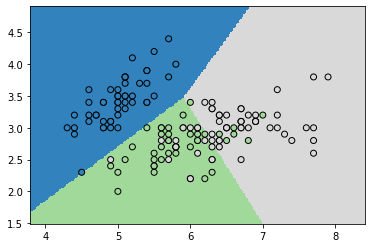

In [203]:
# 위에서 만든 x,y쌍을 모델을 통해 예측함
# pcolormesh : 내장된 칼라맵을 통해 지정한 위치에 히트맵을 그려주는 함수.
# pcolormesh(x좌표, y좌표, 색상값, 칼라맵)
results = lrclf.predict(np.c_[xx.ravel(), yy.ravel()])
results = results.reshape(xx.shape)
plt.pcolormesh(xx,yy,results, cmap=plt.cm.tab20c)
# 원본 데이터를 산점도에  표시
plt.scatter(data[:,0], data[:,1], c=target, cmap=plt.cm.tab20c, edgecolors='k')
plt.show()

# 원본 데이터를 산점도에  표시 ↑

### 시각화를 위해 두 변수만 지정 (petal 계열) ↓

In [204]:
data = iris.data[:, :2] # Sepal 속성만

target= iris.target

In [205]:
# 분석시작 
lrclf = LogisticRegression(solver='lbfgs')
lrclf.fit(data, target)
print(lrclf.score(data, target)) # 훈련정확도

# pcolormesh 함수 사용시 필요!
plt.rcParams['pcolor.shading'] = 'nearest'

0.82


In [206]:
# 다항로지스틱 결정경계 시각화
x_min = data[:,0].min() - 0.5 # x축 최대/최소
x_max = data[:,0].max() + 0.5

y_min = data[:,1].min() - 0.5 # y축 최대/최소
y_max = data[:,1].max() + 0.5

In [207]:
# x/y 축 범위의 값들 생성

# 생성한 값들을 x,y쌍으로 좌표펴면에 배치
# 즉, 예측값을 나타낼 좌표평면을 정의함
xm = np.arange(x_min, x_max, 0.02)
ym = np.arange(y_min, y_max, 0.02)
xx, yy = np.meshgrid(xm, ym)
xx[:1]
yy[:1]

array([[1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5,
        1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5,
        1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5,
        1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5,
        1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5,
        1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5,
        1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5,
        1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5,
        1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5,
        1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5,
        1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5,
        1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5,
        1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5,
        1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5

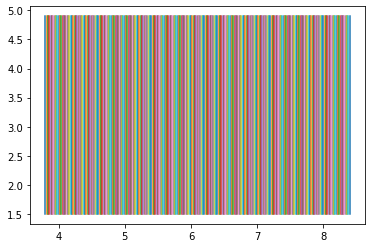

In [208]:
# 지금까지의 작업 확인
plt.plot(xx, yy)
plt.show()

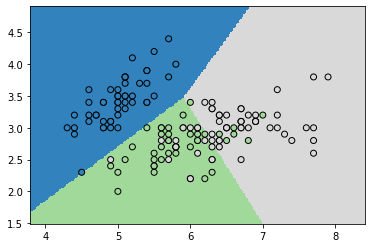

In [209]:
# 위에서 만든 x,y쌍을 모델을 통해 예측함
# pcolormesh : 내장된 칼라맵을 통해 지정한 위치에 히트맵을 그려주는 함수.
# pcolormesh(x좌표, y좌표, 색상값, 칼라맵)
results = lrclf.predict(np.c_[xx.ravel(), yy.ravel()])
results = results.reshape(xx.shape)
plt.pcolormesh(xx,yy,results, cmap=plt.cm.tab20c)
# 원본 데이터를 산점도에  표시
plt.scatter(data[:,0], data[:,1], c=target, cmap=plt.cm.tab20c, edgecolors='k')
plt.show()

### 결정영역 시각화 관련 파일 mldpy3.py
* http://naver.me/xFpgDabu

## 파이썬 파일 불러오기 -> import 파이썬파일명

In [225]:
import mldlpy3

/home/hadoop/mldlpy3.py:29: UserWarning: You passed a edgecolor/edgecolors ('k') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  marker=markers[idx],


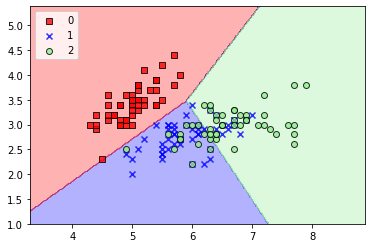

In [227]:
mldlpy3.plot_decision_regions(data, target, lrclf)